Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.
(eksik değerleri aykırı değerleri tamamladıktan sonra)

Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

Matematik ve okuma notlarının dağılımı nedir?

Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv("states_all.csv")

In [3]:
data.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

Verilerde kullanmayacağım sütunları atacağım. Yukarıda sorulan sorularda işime yarayacak sütunları alıp dataframe atayacağım. Ve bunlar üzerinden eksik değer aykırı değer olarak ve tek değişkenli analizini yapacağım.

In [5]:
data = data[["STATE","YEAR","TOTAL_REVENUE","TOTAL_EXPENDITURE","GRADES_4_G","GRADES_8_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]

In [6]:
data.head(3)

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,2678885.0,2653798.0,57948.0,58025.0,208.0,252.0,207.0,NaN
1,ALASKA,1992,1049591.0,972488.0,9748.0,8789.0,NaN,NaN,NaN,NaN
2,ARIZONA,1992,3258079.0,3401580.0,55433.0,49081.0,215.0,265.0,209.0,NaN


In [7]:
data.describe(include="all")

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715.000000,1.275000e+03,1.275000e+03,1632.000000,1632.000000,565.000000,602.000000,650.000000,562.000000
unique,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RHODE_ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2002.075219,9.102045e+06,9.206242e+06,69166.507966,68106.537377,236.327434,278.280731,218.806154,263.558719
std,NaN,9.568621,1.175962e+07,1.199279e+07,79957.990356,77965.847263,9.285505,10.343482,7.681805,6.612601
min,NaN,1986.000000,4.656500e+05,4.816650e+05,4577.000000,3371.000000,192.000000,231.000000,179.000000,236.000000
25%,NaN,1994.000000,2.189504e+06,2.170404e+06,18971.500000,19594.250000,232.000000,272.000000,215.000000,260.000000
50%,NaN,2002.000000,5.085826e+06,5.242672e+06,49087.000000,47880.000000,238.000000,280.500000,220.000000,265.000000
75%,NaN,2010.000000,1.084516e+07,1.074420e+07,78504.250000,78976.000000,242.000000,286.000000,224.000000,268.000000


In [8]:
data.isnull().sum()/len(data)*100

STATE                   0.000000
YEAR                    0.000000
TOTAL_REVENUE          25.655977
TOTAL_EXPENDITURE      25.655977
GRADES_4_G              4.839650
GRADES_8_G              4.839650
AVG_MATH_4_SCORE       67.055394
AVG_MATH_8_SCORE       64.897959
AVG_READING_4_SCORE    62.099125
AVG_READING_8_SCORE    67.230321
dtype: float64

In [9]:
data.groupby(by=["STATE"])["TOTAL_EXPENDITURE"].mean()

STATE
ALABAMA                  5690278.88
ALASKA                   1817666.40
ARIZONA                  6549709.12
ARKANSAS                 3707725.96
CALIFORNIA              56247851.32
COLORADO                 6662776.40
CONNECTICUT              7197858.72
DELAWARE                 1374873.48
DISTRICT_OF_COLUMBIA     1017167.84
DODEA                           NaN
FLORIDA                 21287605.24
GEORGIA                 13332004.36
HAWAII                   1775751.76
IDAHO                    1644000.32
ILLINOIS                21444064.84
INDIANA                  9406665.08
IOWA                     4734091.40
KANSAS                   4245505.64
KENTUCKY                 5350342.72
LOUISIANA                5966403.88
MAINE                    2110503.12
MARYLAND                 9574154.72
MASSACHUSETTS           11740076.32
MICHIGAN                17026245.84
MINNESOTA                8861633.52
MISSISSIPPI              3385137.08
MISSOURI                 7830981.52
MONTANA               

In [10]:
data.groupby(by=["STATE","YEAR"])["TOTAL_REVENUE"].mean()

STATE    YEAR
ALABAMA  1986          NaN
         1987          NaN
         1988          NaN
         1989          NaN
         1990          NaN
                   ...    
WYOMING  2014    1772633.0
         2015    1962874.0
         2016    2044669.0
         2017          NaN
         2019          NaN
Name: TOTAL_REVENUE, Length: 1715, dtype: float64

Yukarıda boş olan toplam gelirleri ülkeler bazında yıllık ortalaması ile doldurmayı düşünmüştüm. Ancak bazı ülkelerin toplam geliri yılları bazında da boş geliyor. 
Bence toplam geliri hiç olmayan bir ülkeyi doldurmak mantıklı olmaz.toplam gelir toplam harcama analizi için toplam geliri boş olan ülkeleri verisetimizden çıkaralım. Geri kalanı da ortalaması ile dolduralım.


In [11]:
#data["TOTAL_REVENUE"]=data["TOTAL_REVENUE"].fillna(data["TOTAL_REVENUE"].mean())
data["TOTAL_REVENUE"]=data.groupby(["STATE"])["TOTAL_REVENUE"].apply(lambda x: x.fillna(x.mean()))
data["TOTAL_EXPENDITURE"]=data.groupby(["STATE"])["TOTAL_EXPENDITURE"].apply(lambda x: x.fillna(x.mean()))

In [12]:
data.groupby(by=["STATE","YEAR"])["TOTAL_REVENUE"].mean()

STATE    YEAR
ALABAMA  1986    5545854.92
         1987    5545854.92
         1988    5545854.92
         1989    5545854.92
         1990    5545854.92
                    ...    
WYOMING  2014    1772633.00
         2015    1962874.00
         2016    2044669.00
         2017    1173952.68
         2019    1173952.68
Name: TOTAL_REVENUE, Length: 1715, dtype: float64

In [13]:
#data["TOTAL_EXPENDITURE"].fillna(data.groupby(by=["STATE"])["TOTAL_EXPENDITURE"].mean())

In [14]:
data.isnull().sum()/len(data)*100

STATE                   0.000000
YEAR                    0.000000
TOTAL_REVENUE           1.865889
TOTAL_EXPENDITURE       1.865889
GRADES_4_G              4.839650
GRADES_8_G              4.839650
AVG_MATH_4_SCORE       67.055394
AVG_MATH_8_SCORE       64.897959
AVG_READING_4_SCORE    62.099125
AVG_READING_8_SCORE    67.230321
dtype: float64

Şimdi bu iki kolonda eksik veriler %1 küsurlara inmiş bunları verisetinden çıkarmak istiyorum.

In [15]:
data.shape[0]

1715

In [16]:
data.dropna(subset=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'],inplace=True)

In [17]:
data.shape[0]

1683

Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [18]:
data = data[data["STATE"]=="CALIFORNIA"]

In [19]:
data =data.sort_values(by='YEAR', ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

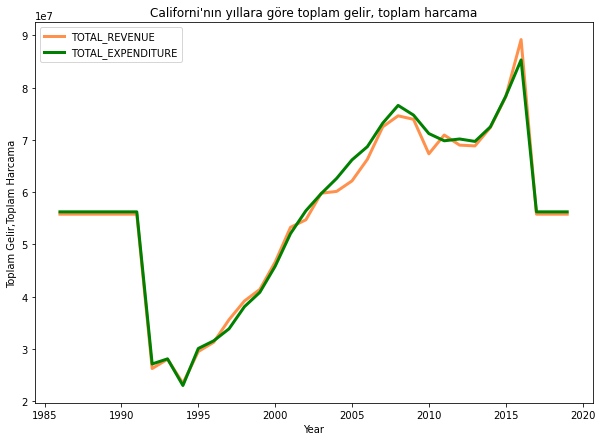

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(data["YEAR"],data["TOTAL_REVENUE"],c = "#FF914D", lw = 3)
plt.plot(data["YEAR"],data["TOTAL_EXPENDITURE"],c = "green", lw = 3)
plt.title("Californi'nın yıllara göre toplam gelir, toplam harcama")
plt.xlabel("Year")
plt.ylabel("Toplam Gelir,Toplam Harcama")
plt.legend(['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])
plt.show

Bu iki değişken beraber hareket etmektedir. 1994 lerde dip yapmıi 2015 de zirveyi görmüş.

Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [21]:
data

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1303,CALIFORNIA,1986,55799199.28,56247851.32,325902.0,304787.0,NaN,NaN,NaN,NaN
1304,CALIFORNIA,1987,55799199.28,56247851.32,335078.0,311579.0,NaN,NaN,NaN,NaN
1305,CALIFORNIA,1988,55799199.28,56247851.32,352076.0,318856.0,NaN,NaN,NaN,NaN
1306,CALIFORNIA,1989,55799199.28,56247851.32,379538.0,330967.0,NaN,NaN,NaN,NaN
1307,CALIFORNIA,1990,55799199.28,56247851.32,399293.0,347479.0,NaN,256.0,NaN,NaN
1308,CALIFORNIA,1991,55799199.28,56247851.32,412613.0,355168.0,NaN,NaN,NaN,NaN
4,CALIFORNIA,1992,26260025.00,27138832.00,418418.0,363296.0,208.0,261.0,202.0,NaN
55,CALIFORNIA,1993,28043338.00,28110986.00,420233.0,380223.0,NaN,NaN,NaN,NaN
106,CALIFORNIA,1994,23440845.00,23012688.00,426919.0,388561.0,NaN,NaN,197.0,NaN
157,CALIFORNIA,1995,29512214.00,30097549.00,428553.0,399039.0,NaN,NaN,NaN,NaN


Yukarıda not kısımlarında çok eksik veri var. Öncelikle eksik verileri kaldırıp bir bakmak istiyorum başarı oranlarını daha sonra diğer sorudaki gibi bu başarı oranlarını doldurduğum eksik değerler ile kontrol etmek itiyorum.

Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

Matematik ve okuma notlarının dağılımı nedir?

Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

<function matplotlib.pyplot.show(close=None, block=None)>

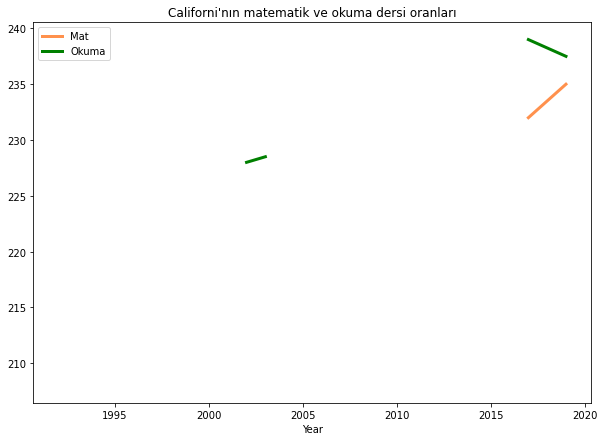

In [22]:
data["AVG_MATH_4+8_SCORE"]= (data["AVG_MATH_4_SCORE"] + data["AVG_MATH_4_SCORE"])/2
data["AVG_READ_4+8_SCORE"]= (data["AVG_READING_4_SCORE"] + data["AVG_READING_8_SCORE"])/2
plt.figure(figsize=(10, 7))
plt.plot(data["YEAR"],data["AVG_MATH_4+8_SCORE"],c = "#FF914D", lw = 3)
plt.plot(data["YEAR"],data["AVG_READ_4+8_SCORE"],c = "green", lw = 3)
plt.title("Californi'nın matematik ve okuma dersi oranları")
plt.xlabel("Year")
#plt.ylabel("Toplam Gelir,Toplam Harcama")
plt.legend(['Mat', 'Okuma'])
plt.show

Yukarıda eksik değerlerden çok kötü bir grafik görüyorum. eksik değerleri kaldırdığımda da çok güzel bir analiz olmayacak öyle deneyelim. Burada son yıllarda okumanın matematiğie göre daha iyi olduğunu söyleyebilirim.

In [23]:
data2 = data.dropna()

In [45]:
data2.sort_values(by="YEAR")

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_4+8_SCORE,AVG_READ_4+8_SCORE
565,CALIFORNIA,2003,59815855.00,59749885.00,493415.0,500143.0,227.0,267.0,206.0,251.0,227.0,228.5
667,CALIFORNIA,2005,62171797.00,66196072.00,477828.0,489560.0,230.0,269.0,207.0,250.0,230.0,228.5
769,CALIFORNIA,2007,72516936.00,73225422.00,467305.0,490054.0,230.0,270.0,209.0,251.0,230.0,230.0
871,CALIFORNIA,2009,73958896.00,74766086.00,465866.0,472856.0,232.0,270.0,210.0,253.0,232.0,231.5
973,CALIFORNIA,2011,70953331.00,69847705.00,462082.0,467626.0,234.0,273.0,211.0,255.0,234.0,233.0
1075,CALIFORNIA,2013,68868516.00,69727119.00,470515.0,472381.0,234.0,276.0,213.0,262.0,234.0,237.5
1177,CALIFORNIA,2015,78248042.00,78365958.00,485885.0,465322.0,232.0,275.0,213.0,259.0,232.0,236.0
1309,CALIFORNIA,2017,55799199.28,56247851.32,466660.0,474828.0,232.0,277.0,215.0,263.0,232.0,239.0


In [58]:
grup=data2.groupby(by="YEAR")["AVG_MATH_4+8_SCORE","AVG_READ_4+8_SCORE"].mean()
grup

<ipython-input-58-2461b1580a5f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grup=data2.groupby(by="YEAR")["AVG_MATH_4+8_SCORE","AVG_READ_4+8_SCORE"].mean()


,AVG_MATH_4+8_SCORE,AVG_READ_4+8_SCORE
YEAR,,
2003,227.0,228.5
2005,230.0,228.5
2007,230.0,230.0
2009,232.0,231.5
2011,234.0,233.0
2013,234.0,237.5
2015,232.0,236.0
2017,232.0,239.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x504 with 0 Axes>

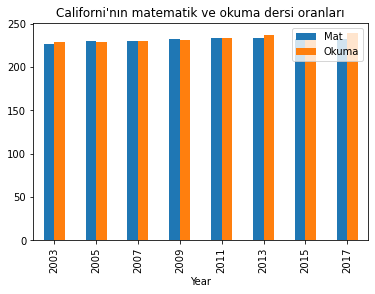

In [60]:
plt.figure(figsize=(10, 7))
#plt.bar(data2["YEAR"],data2.iloc[:,2:4], color = "#FF914D")
grup.plot(kind='bar', legend=[''])
plt.title("Californi'nın matematik ve okuma dersi oranları")
plt.xlabel("Year")
#plt.ylabel("Toplam Gelir,Toplam Harcama")
plt.legend(['Mat', 'Okuma'])
plt.show

Okumanın daha yüksek olduğu görülüyor.

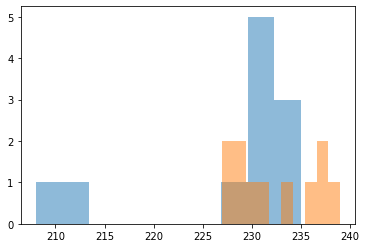

In [65]:
plt.hist(data["AVG_MATH_4+8_SCORE"],alpha=.5)
plt.hist(data["AVG_READ_4+8_SCORE"],alpha=.5)
plt.show()

#normal dağılmamış.

Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [82]:
data_not = data[["YEAR","AVG_MATH_4+8_SCORE","AVG_READ_4+8_SCORE"]]
data_not

,YEAR,AVG_MATH_4+8_SCORE,AVG_READ_4+8_SCORE
1303,1986,NaN,NaN
1304,1987,NaN,NaN
1305,1988,NaN,NaN
1306,1989,NaN,NaN
1307,1990,NaN,NaN
1308,1991,NaN,NaN
4,1992,208.0,NaN
55,1993,NaN,NaN
106,1994,NaN,NaN
157,1995,NaN,NaN


In [85]:
#ortalama ile dolduralım.

data_not["ort"]=data_not["AVG_MATH_4+8_SCORE"].fillna(data_not["AVG_MATH_4+8_SCORE"].mean())
data_not["ort"]

<ipython-input-85-495996c70f8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not["ort"]=data_not["AVG_MATH_4+8_SCORE"].fillna(data_not["AVG_MATH_4+8_SCORE"].mean())


1303    227.909091
1304    227.909091
1305    227.909091
1306    227.909091
1307    227.909091
1308    227.909091
4       208.000000
55      227.909091
106     227.909091
157     227.909091
208     227.909091
259     227.909091
310     227.909091
361     227.909091
412     213.000000
463     227.909091
514     227.909091
565     227.000000
616     227.909091
667     230.000000
718     227.909091
769     230.000000
820     227.909091
871     232.000000
922     227.909091
973     234.000000
1024    227.909091
1075    234.000000
1126    227.909091
1177    232.000000
1228    227.909091
1309    232.000000
1666    235.000000
Name: ort, dtype: float64

In [86]:
#median ile dolduralım.
data_not["median"]=data_not["AVG_MATH_4+8_SCORE"].fillna(data_not["AVG_MATH_4+8_SCORE"].median())
data_not["median"]

<ipython-input-86-38b004b0bfa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not["median"]=data_not["AVG_MATH_4+8_SCORE"].fillna(data_not["AVG_MATH_4+8_SCORE"].median())


1303    232.0
1304    232.0
1305    232.0
1306    232.0
1307    232.0
1308    232.0
4       208.0
55      232.0
106     232.0
157     232.0
208     232.0
259     232.0
310     232.0
361     232.0
412     213.0
463     232.0
514     232.0
565     227.0
616     232.0
667     230.0
718     232.0
769     230.0
820     232.0
871     232.0
922     232.0
973     234.0
1024    232.0
1075    234.0
1126    232.0
1177    232.0
1228    232.0
1309    232.0
1666    235.0
Name: median, dtype: float64

In [88]:
#enterpolasyon ile dolduralım.
data_not["interpolate"]=data_not["AVG_MATH_4+8_SCORE"].interpolate()
data_not["interpolate"]

<ipython-input-88-743e1f72d480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not["interpolate"]=data_not["AVG_MATH_4+8_SCORE"].interpolate()


1303           NaN
1304           NaN
1305           NaN
1306           NaN
1307           NaN
1308           NaN
4       208.000000
55      208.625000
106     209.250000
157     209.875000
208     210.500000
259     211.125000
310     211.750000
361     212.375000
412     213.000000
463     217.666667
514     222.333333
565     227.000000
616     228.500000
667     230.000000
718     230.000000
769     230.000000
820     231.000000
871     232.000000
922     233.000000
973     234.000000
1024    234.000000
1075    234.000000
1126    233.000000
1177    232.000000
1228    232.000000
1309    232.000000
1666    235.000000
Name: interpolate, dtype: float64

In [90]:
#bu doldurma yöntemlerine göre kıyaslayalım.
data_not.drop("AVG_READ_4+8_SCORE",axis=1).describe()

,YEAR,AVG_MATH_4+8_SCORE,ort,median,interpolate
count,33.000000,11.000000,33.000000,33.000000,27.000000
mean,2002.030303,227.909091,227.909091,230.636364,223.777778
std,9.722670,8.960519,5.009083,5.378302,10.247876
min,1986.000000,208.000000,208.000000,208.000000,208.000000
25%,1994.000000,228.500000,227.909091,232.000000,212.062500
50%,2002.000000,232.000000,227.909091,232.000000,230.000000
75%,2010.000000,233.000000,227.909091,232.000000,232.000000
max,2019.000000,235.000000,235.000000,235.000000,235.000000


Yakın rakamlar olmuş. Ancak daha farklı bunlardan hangisini almalıyım emin olamadım. İçgüdüsel olarak burada mean () geldi ama neye göre belirlemeliyim daha nasıl fonksiyonlarla bunları kıyaslamalıyım bilemedim.

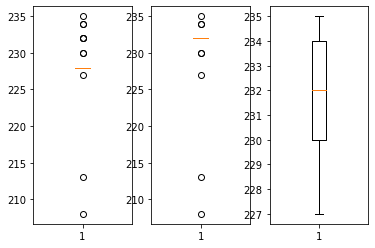

In [96]:
plt.subplot(1,3,1)
plt.boxplot(data_not["ort"])

plt.subplot(1,3,2)
plt.boxplot(data_not["median"])

plt.subplot(1,3,3)
data_not=data_not.dropna()
plt.boxplot(data_not["interpolate"])
plt.show()

Aykırı değerlerden dolayı burada interpolate seçmek daha mı mantıklı?

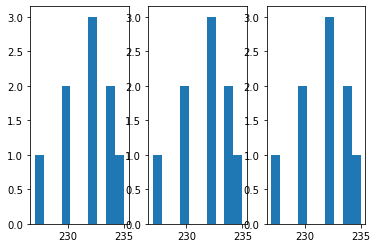

In [97]:
plt.subplot(1,3,1)
plt.hist(data_not["ort"])

plt.subplot(1,3,2)
plt.hist(data_not["median"])

plt.subplot(1,3,3)
data_not=data_not.dropna()
plt.hist(data_not["interpolate"])
plt.show()